In [1]:
import numpy as np
from sympy.physics.wigner import wigner_3j,wigner_6j
import sympy as sy
from numpy import linalg as LA
from IPython.display import Latex,display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette('terrain')
from YbOH_Energy_Levels_symbolic import YbOHLevels
np.set_printoptions(precision=5, suppress=True)
%matplotlib inline
import time

In [22]:
t0 = time.perf_counter()
A000_174 = YbOHLevels.initialize_state('174', 'A000',[1], M_values = 'all', I = [0,1/2],S=1/2, round=6)
t1 = time.perf_counter()
elapsed = t1 - t0
print(elapsed, 'sec')

0.45408369999995557 sec


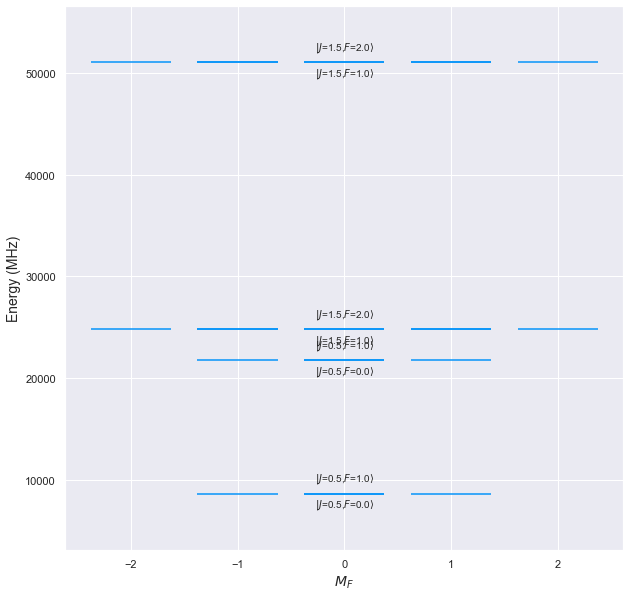

In [24]:
A000_174.display_levels(1e-8,1e-8,'F',label_q = ['J','F'],alt_label=True)

In [34]:
Ez = np.linspace(0.0,100000,5001)

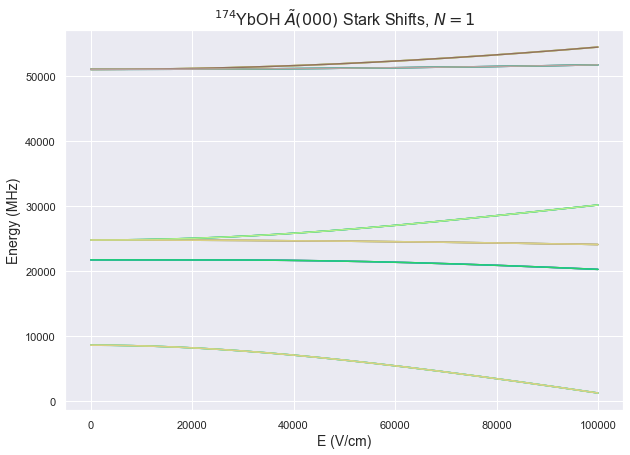

In [36]:
A000_174.StarkMap(Ez,0.001,plot=True)

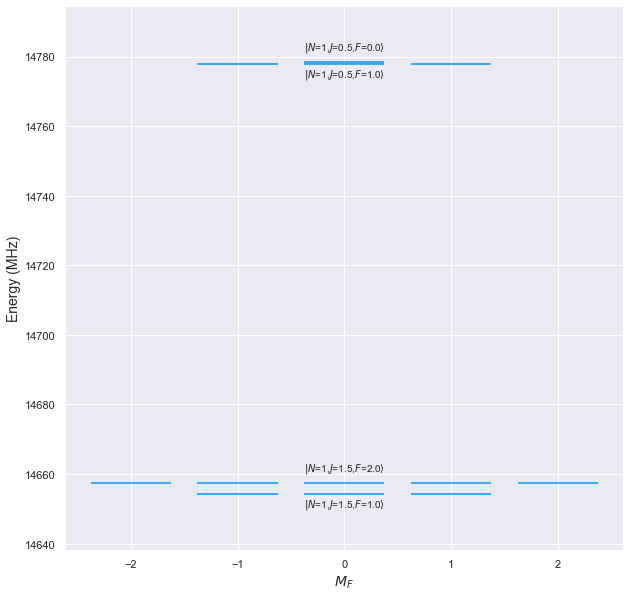

In [10]:
X010_174.display_levels(1e-8,1e-8,'F',label_q = ['N','J','F'],alt_label=True)

In [4]:
Bz = np.linspace(0.001,100,200)
Ez = np.linspace(0.0,500,200)

In [5]:
t0 = time.perf_counter()
X010_174.EB_grid(Ez,Bz,PTV=True,E_or_B_first='E')
t1 = time.perf_counter()
elapsed = t1 - t0
print(elapsed, 'sec')

518.0993257 sec


In [33]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))

In [34]:
from matplotlib.colors import TwoSlopeNorm

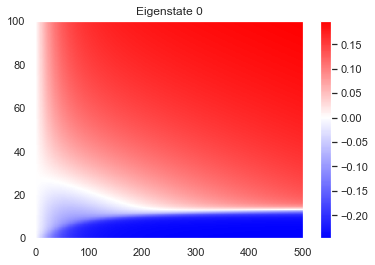

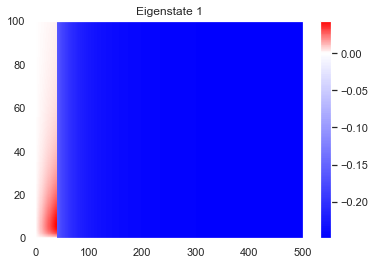

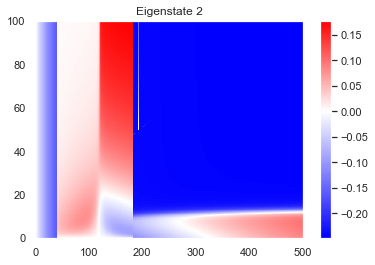

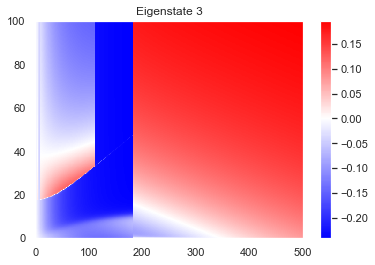

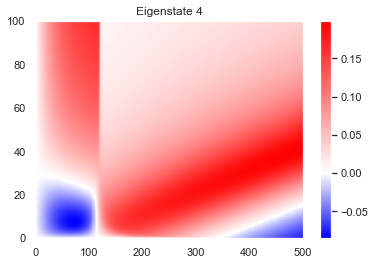

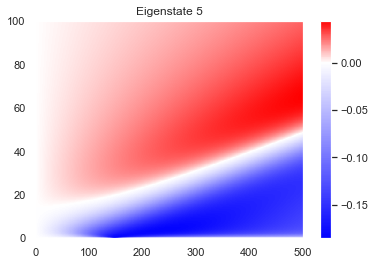

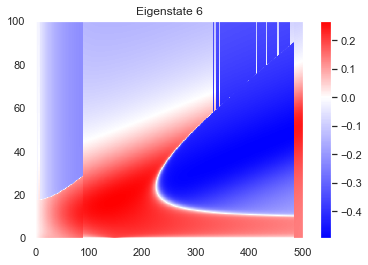

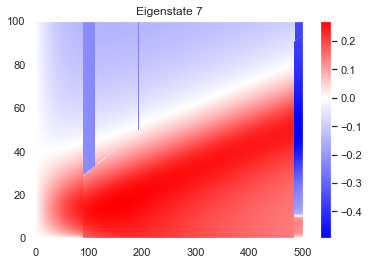

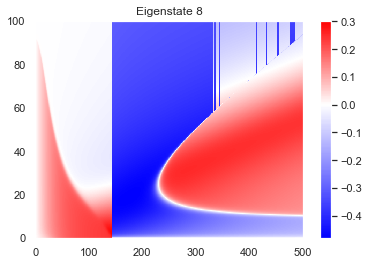

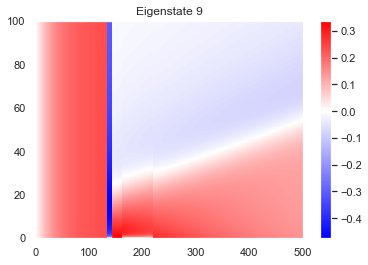

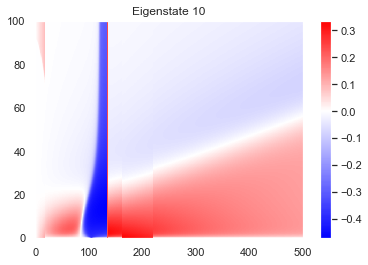

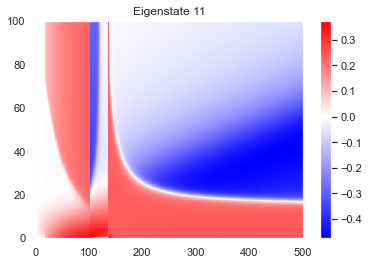

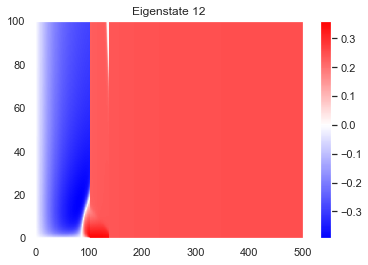

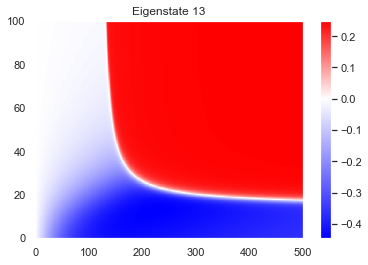

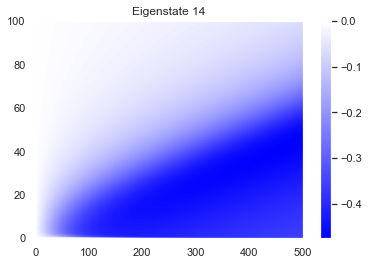

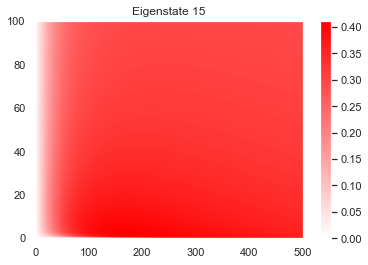

In [18]:
for i in range(len(X010_174.evals0)):
    plt.figure()
    plt.pcolormesh(*mesh,X010_174.PTV_EB[i],shading='auto',cmap='bwr',norm=TwoSlopeNorm(0))
    plt.colorbar()
    plt.title('Eigenstate {}'.format(i))

In [5]:
t0 = time.process_time()
X010_174.EB_grid(Ez,Bz,PTV=True,E_or_B_first='B')
t1 = time.process_time()
elapsed = t1 - t0
print(elapsed, 'sec')

9.421875 sec


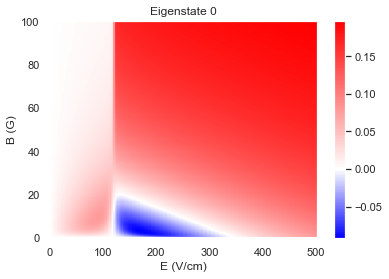

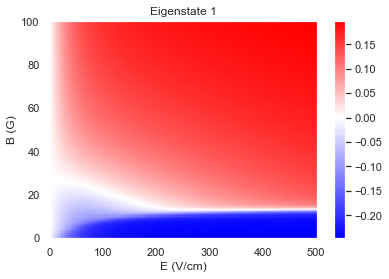

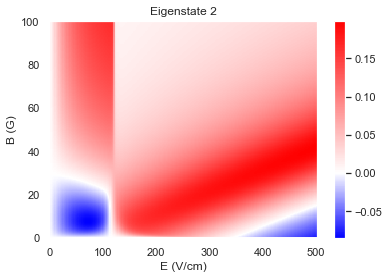

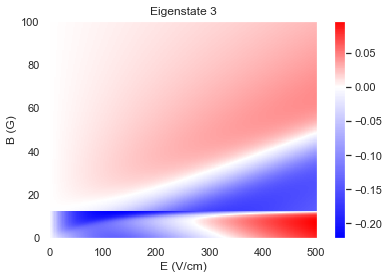

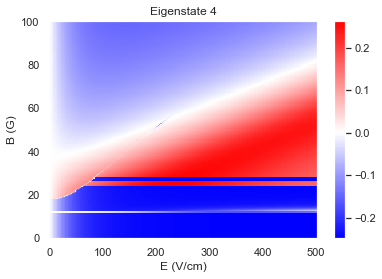

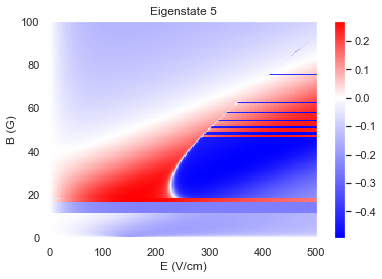

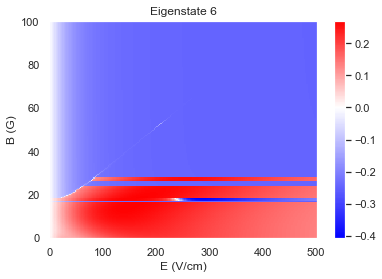

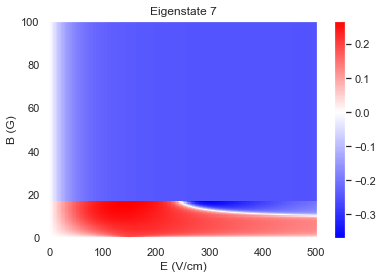

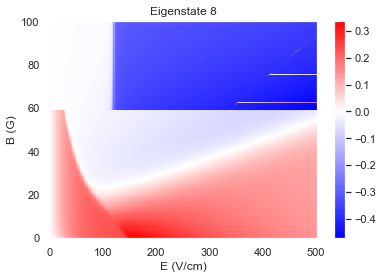

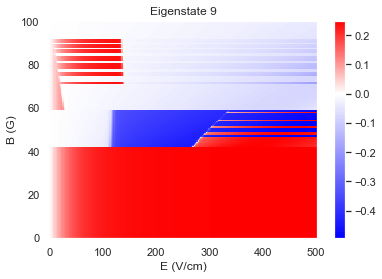

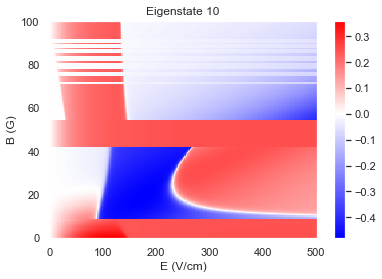

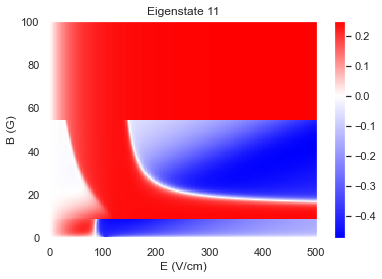

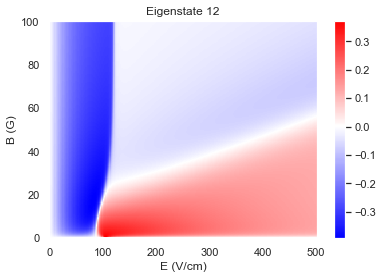

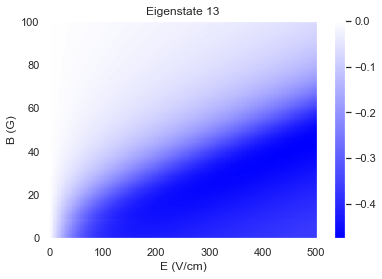

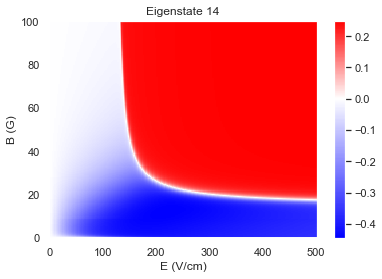

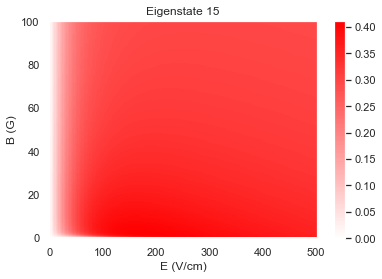

In [6]:
from matplotlib.colors import TwoSlopeNorm
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(X010_174.evals0)):
    plt.figure()
    plt.pcolormesh(*mesh,X010_174.PTV_EB[i],shading='auto',cmap='bwr',norm=TwoSlopeNorm(0))
    plt.colorbar()
    plt.title('Eigenstate {}'.format(i))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')

In [29]:
print(time.perf_counter())

9716.4332464


In [30]:
print(time.perf_counter())

9722.7694478


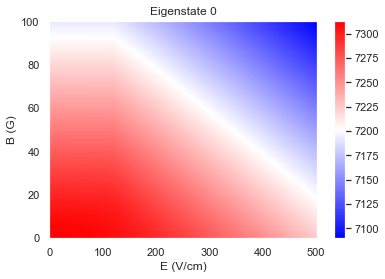

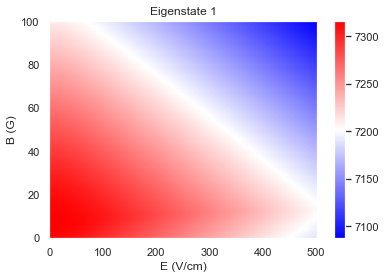

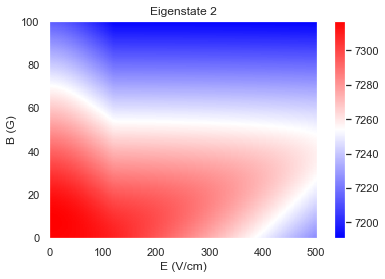

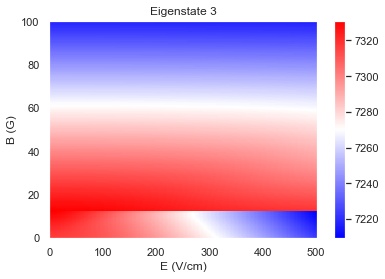

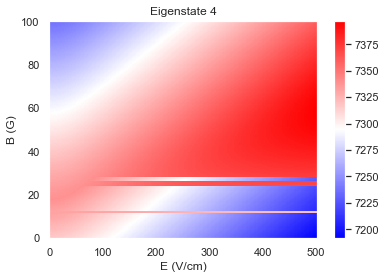

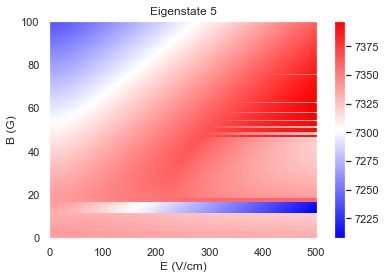

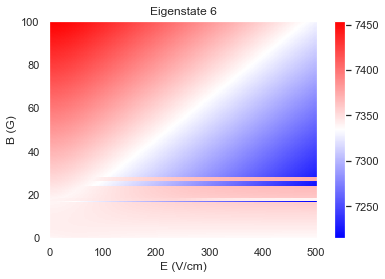

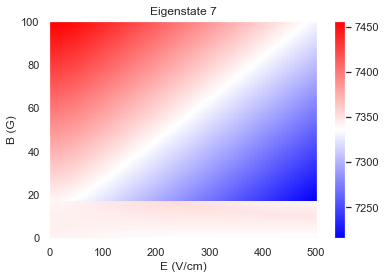

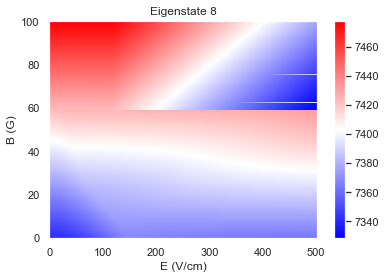

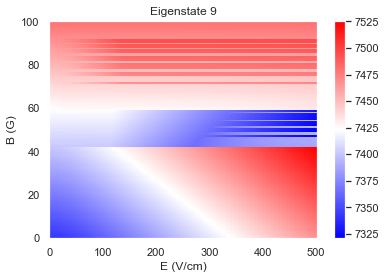

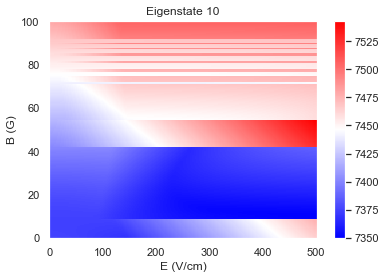

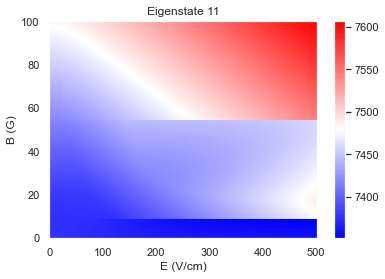

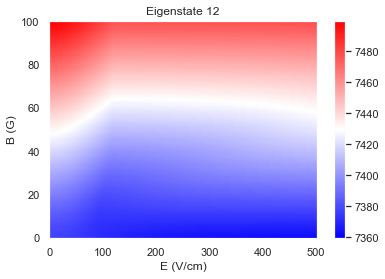

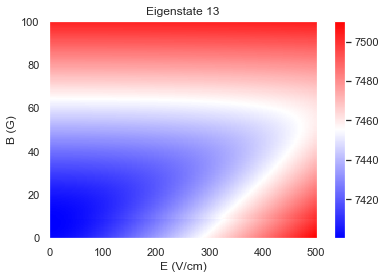

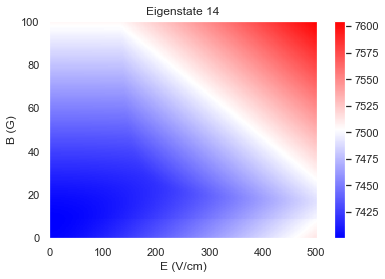

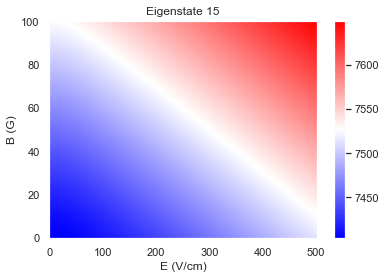

In [7]:
from matplotlib.colors import TwoSlopeNorm
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
for i in range(len(X010_174.evals0)):
    plt.figure()
    plt.pcolormesh(*mesh,X010_174.evals_EB[i],shading='auto',cmap='bwr')
    plt.colorbar()
    plt.title('Eigenstate {}'.format(i))
    plt.xlabel('E (V/cm)')
    plt.ylabel('B (G)')

In [53]:
X010_174.ZeemanMap(Bz,0.1)

In [37]:
H_PTV = X010_174.library.PTV_builders[X010_174.iso_state](X010_174.q_numbers)

In [54]:
X010_174.evecs_B[0][3]@H_PTV@X010_174.evecs_B[0][3]

0.0005278550022499856

In [55]:
np.diagonal(X010_174.evecs_B[0]@H_PTV@X010_174.evecs_B[0].T)

array([ 0.00044,  0.     , -0.00044,  0.00053,  0.00026, -0.     ,
       -0.00026, -0.00053, -0.00046, -0.     ,  0.00046, -0.00053,
       -0.00026,  0.     ,  0.00026,  0.00053,  0.00068,  0.     ,
       -0.00068, -0.     , -0.00069, -0.     ,  0.00069,  0.     ])

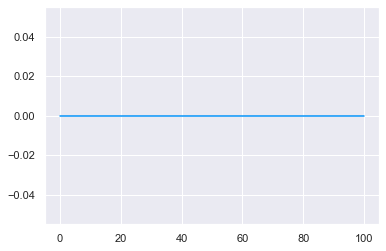

In [11]:
plt.figure()
plt.plot(Bz,X010_174.PTV_EB[10,0,:])

In [57]:
idx = X010_174.select_q({'J':0.5})

In [58]:
X010_174.ZeemanMap(Bz,0)

In [59]:
X010_174.StarkMap(Ez,1e-8)

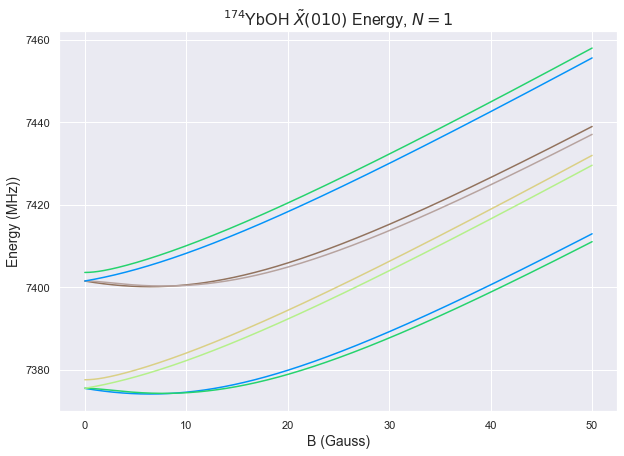

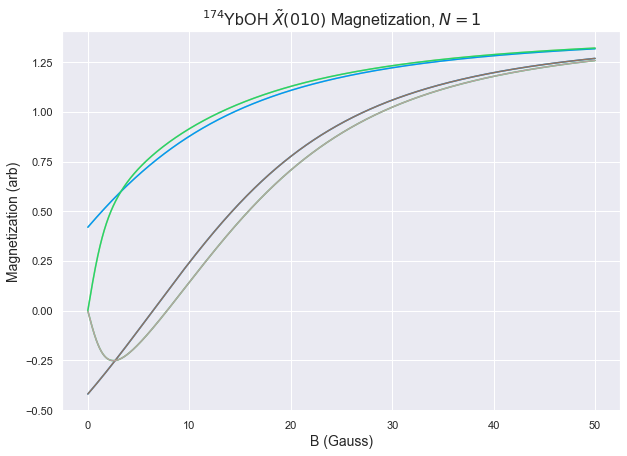

In [60]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_B.T[idx]):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_B.T[idx]):
    grad = np.gradient(trace)
    plt.plot(Bz,grad/(Bz[1]-Bz[0]))
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Magnetization (arb)',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Magnetization, $N=1$',fontsize=16);

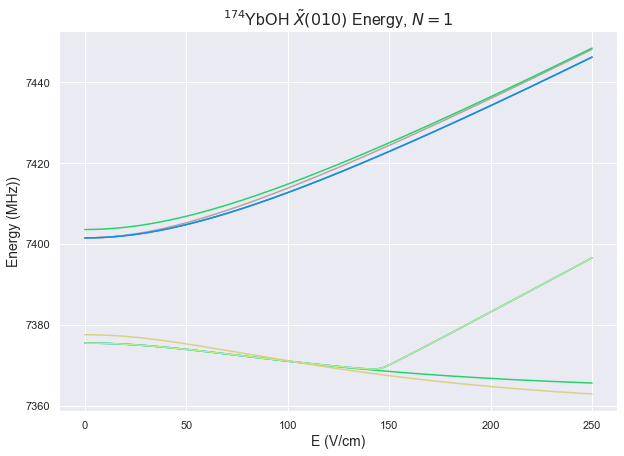

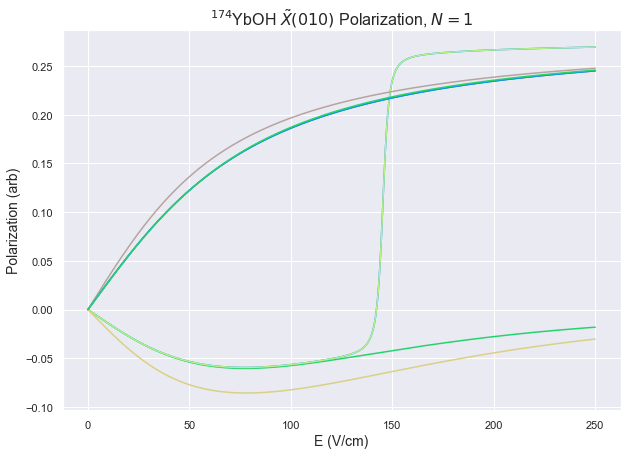

In [61]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_E.T[idx]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_E.T[idx]):
    grad = np.gradient(trace)
    plt.plot(Ez,grad/(Ez[1]-Ez[0]))
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (arb)',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

In [134]:
X010_174.PTV_Map('EDM','E')

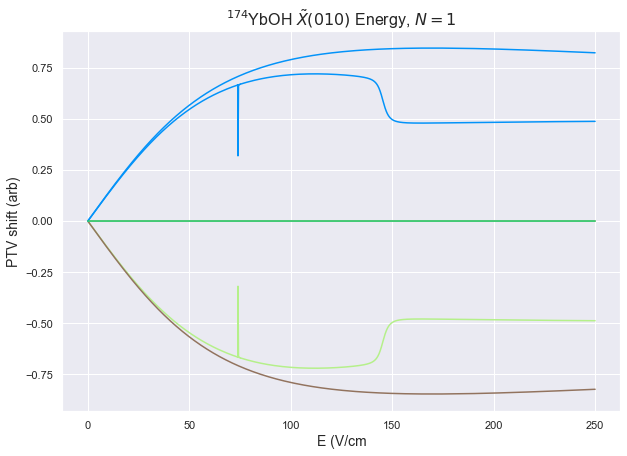

In [135]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.PTV_E.T[idx]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm',fontsize=14)
plt.ylabel('PTV shift (arb)',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);

In [64]:
X010_174.g_eff_Map('E');

array([[-0.80013, -0.00002,  0.80021, ...,  0.00001,  0.29964,  0.     ],
       [-0.80024,  0.     ,  0.80021, ..., -0.00003,  0.29962, -0.00003],
       [-0.80022,  0.00002,  0.80015, ..., -0.00001,  0.29962, -0.00002],
       ...,
       [-0.98974, -0.00001,  0.98978, ..., -0.00003,  0.81982,  0.00001],
       [-0.98969,  0.00003,  0.98973, ..., -0.00001,  0.81988,  0.00001],
       [-0.9898 , -0.00003,  0.98969, ..., -0.00001,  0.81988, -0.00002]])

(0.0001, -0.0001)

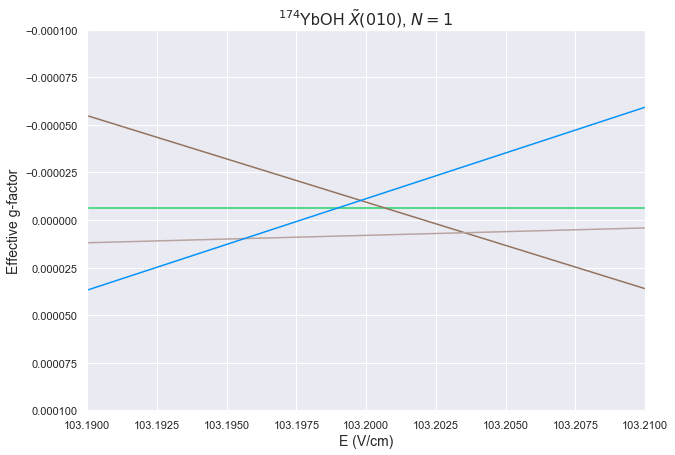

In [71]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.g_eff_E.T[idx]):
    plt.plot(Ez,X010_174.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Effective g-factor',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$, $N=1$',fontsize=16);
plt.xlim(103.19,103.21)
plt.ylim(0.0001,-0.0001)

In [136]:
X010_174.ZeemanMap(Bz,103)

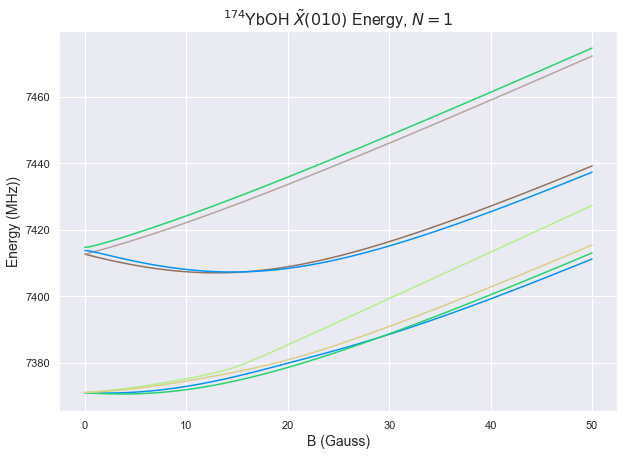

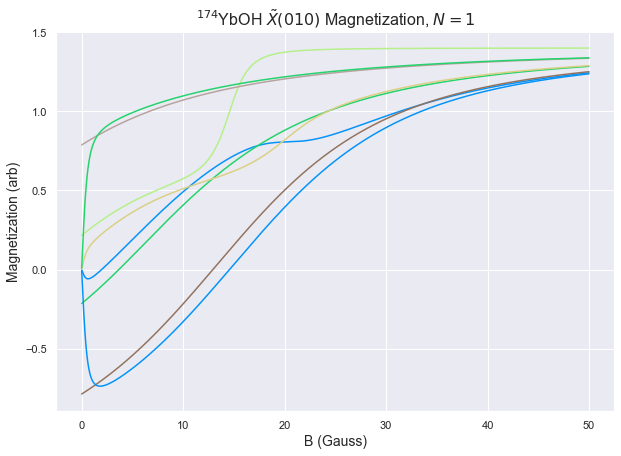

In [81]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_B.T[idx]):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_B.T[idx]):
    grad = np.gradient(trace)
    plt.plot(Bz,grad/(Bz[1]-Bz[0]))
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Magnetization (arb)',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Magnetization, $N=1$',fontsize=16);

In [82]:
X010_174.g_eff_Map('B');

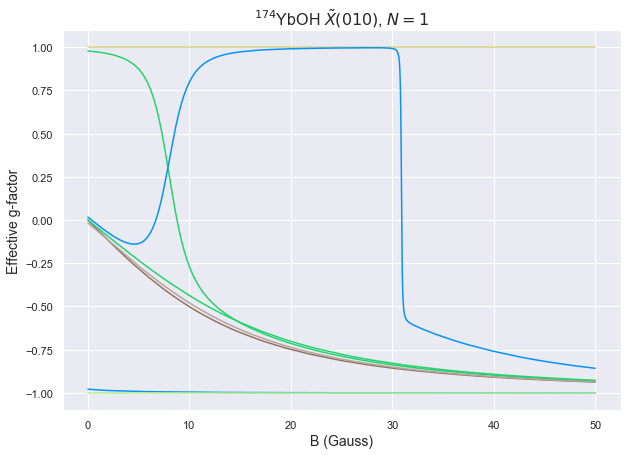

In [110]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.g_eff_B.T[idx]):
    plt.plot(Bz,X010_174.g_eff_B.T[i])
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Effective g-factor',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$, $N=1$',fontsize=16);

In [138]:
X010_174.PTV_Map('EDM','B');

(0, 2)

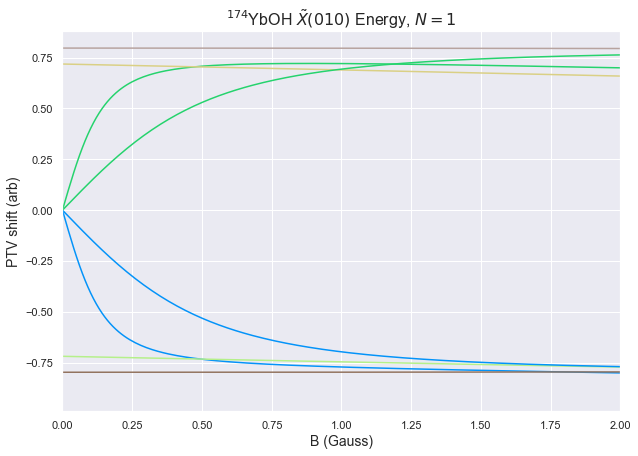

In [140]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.PTV_B.T[idx]):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('PTV shift (arb)',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);
plt.xlim(0,2)

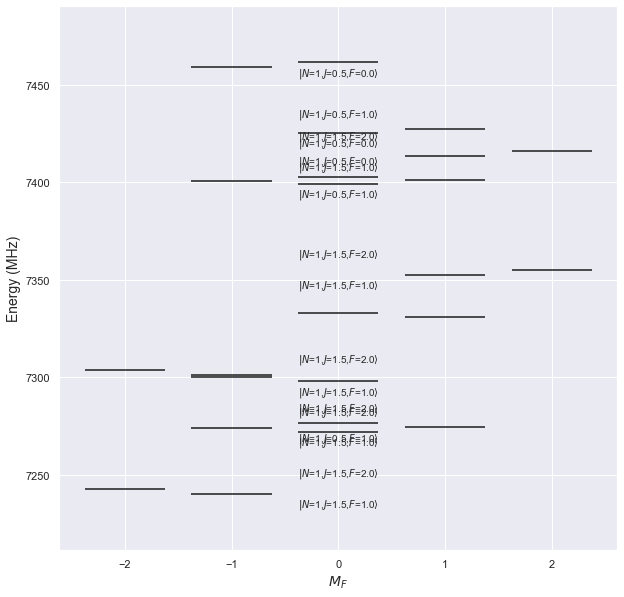

In [116]:
X010_174.display_levels(100,40,'F',label_q = ['N','J','F'],alt_label=True)

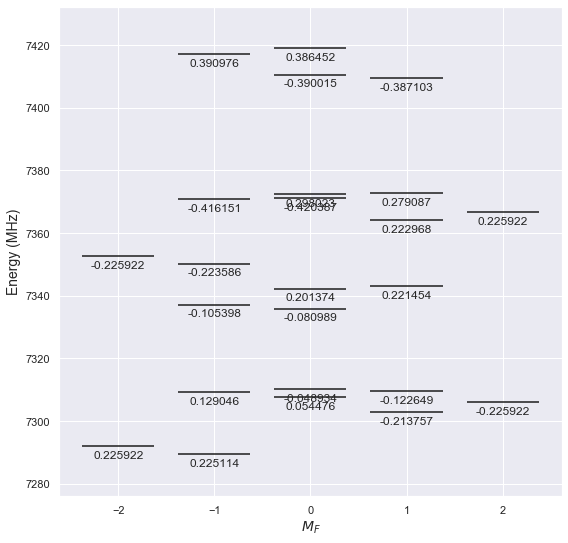

In [334]:
X010_174.display_PTV(100,5,'EDM')

In [197]:
def PTV_slope(self,Ez,Bz,step=1e-3):
    evals0,evecs0 = self.eigensystem(Ez,Bz,set_attr=False)
    evals1,evecs1 = self.eigensystem(Ez,Bz+step,set_attr=False)
    order = state_ordering(evecs0,evecs1,round=self.round)
    evecs1_ordered = evecs1[order,:]
    evals1_ordered = evals1[order]
    PTV_slope = []
    H_PTV = self.library.PTV_builders[self.iso_state](self.q_numbers)
    for E0,E1 in zip(evecs0,evecs1_ordered):
        E_PTV0 = E0@H_PTV@E0
        E_PTV1 = E1@H_PTV@E1
        PTV_slope.append((E_PTV1-E_PTV0))
    PTV_slope = np.array(PTV_slope)
    return PTV_slope

def state_ordering(evecs_old,evecs_new,round=6):
    overlap = abs(np.round(evecs_old@evecs_new.T,round))     #Essentially a matrix of the fidelities: |<phi|psi>|
    #calculate trace distance
    # for o in overlap:
    #     for _o in o:
    #         if (_o>1):
    #             print('OVERLAP BIGGER THAN 1', _o)
    trace_dist = np.sqrt(abs(1-np.square(overlap)))
    ordering = np.array([trace_dist[i,:].argmin() for i in range(len(evecs_old))])
    return ordering

def PTV_slope_Map(self,E_or_B='E',step=1e-3):
    if E_or_B=='E':
        if self.evecs_E is None:
            print('Run StarkMap first')
            return None
        PTV_slope_E = []
        for i,evecs in enumerate(self.evecs_E):
            slope = PTV_slope(self, self.Ez[i],self._Bz,step=step)
            PTV_slope_E.append(slope)
        PTV_slope_E = np.array(PTV_slope_E)
        return PTV_slope_E
    else:
        if self.evecs_B is None:
            print('Run ZeemanMap first')
            return None
        PTV_slope_B = []
        for i,evecs in enumerate(self.evecs_B):
            slope = PTV_slope(self, self.Bz[i],self._Ez,step=step)
            PTV_slope_B.append(slope)
        PTV_slope_B = np.array(PTV_slope_B)
        return PTV_slope_B

In [198]:
PTV_slope_E = PTV_slope_Map(X010_174,'E',step=0.1)

(90, 105)

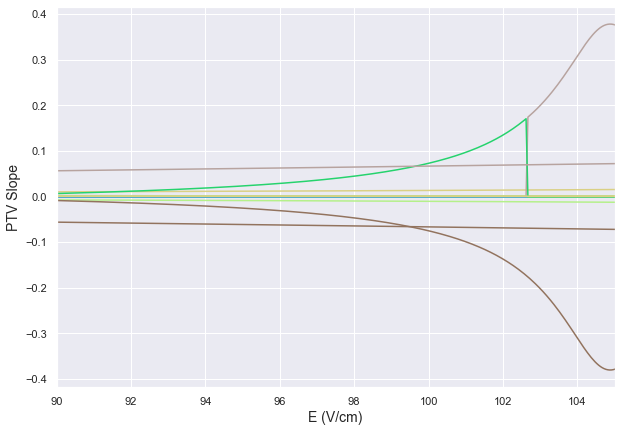

In [201]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(PTV_slope_E.T):
    plt.plot(Ez,PTV_slope_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('PTV Slope',fontsize=14)
plt.xlim(90,105)

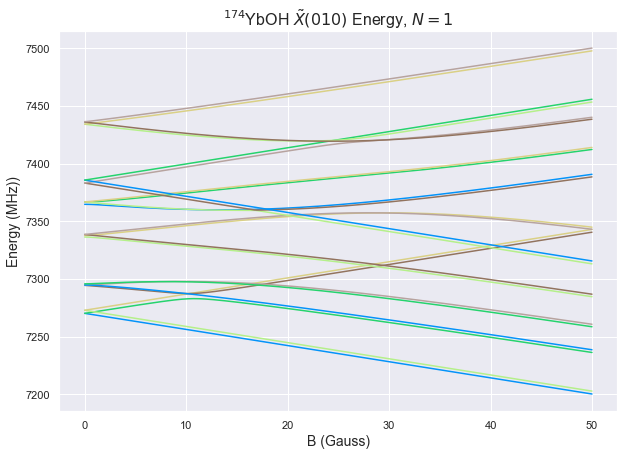

In [34]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_B.T):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);

In [54]:
X010_174.PTV_Map('EDM',plot=False)

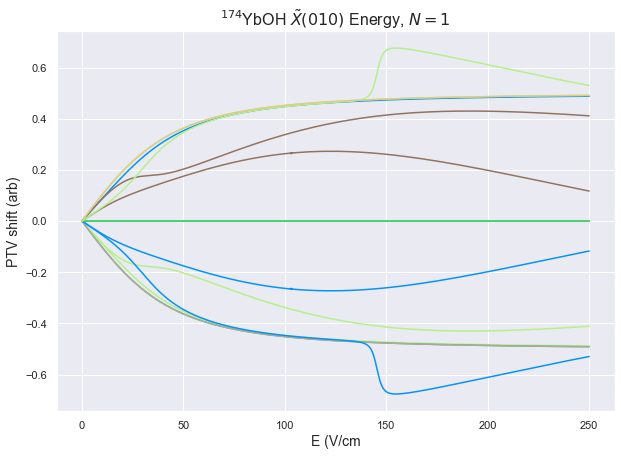

In [2]:
X000_173 = YbOHLevels.initialize_state('173','X000',[1],M_values = 'all',I=[5/2,1/2],S=1/2,round=6)

In [3]:
Gidx = {2:X000_173.select_q({'G':2,'N':1}),3:X000_173.select_q({'G':3,'N':1})}

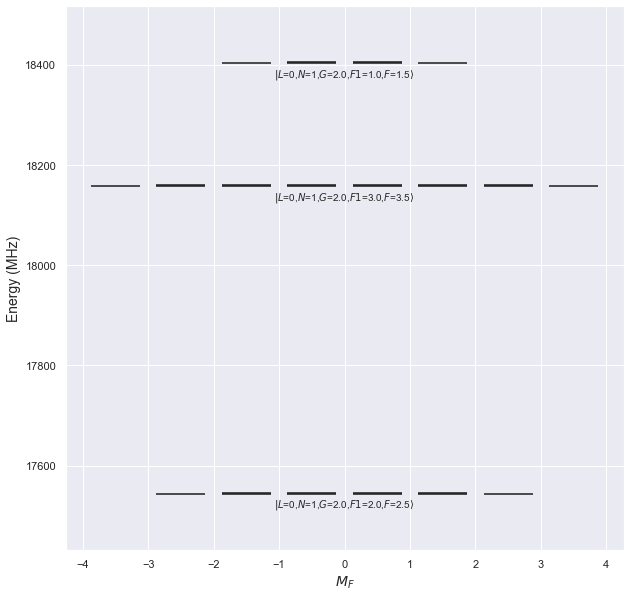

In [4]:
X000_173.display_levels(1e-8,1e-8,'F1',idx = Gidx[2])

In [5]:
Bz = np.linspace(0.001,200,3000)
Ez = np.linspace(0.0,5000,5000)

In [6]:
X000_173.ZeemanMap(Bz,0,plot=False)

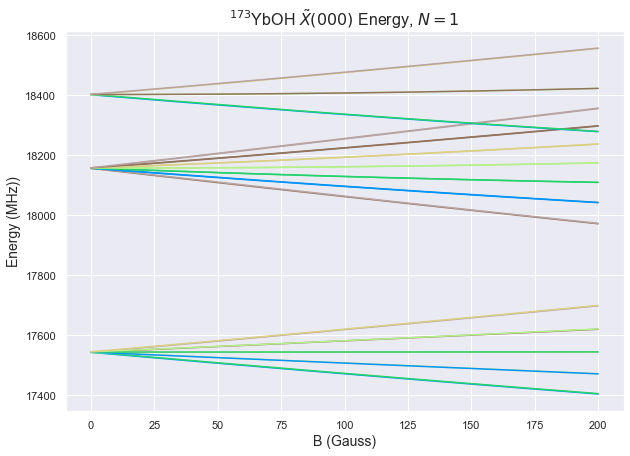

In [7]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X000_173.evals_B.T[Gidx[2]]):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(000)$ Energy, $N=1$',fontsize=16);

In [8]:
X000_173.StarkMap(Ez,1e-8)

NameError: name 'evecs_B' is not defined

In [ ]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X000_173.evals_E.T[Gidx[2]]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(000)$ Energy, $N=1$',fontsize=16);

In [38]:
X000_173.eigensystem(100,1e-8)

(array([11816.37987, 11816.37987, 11816.37987, 11816.37987, 11816.37987,
        11816.37987, 11819.00806, 11819.00806, 11819.00806, 11819.00806,
        11819.00806, 11819.00806, 11819.00806, 11819.00806, 12486.04612,
        12486.04612, 12486.04612, 12486.04612, 12486.04612, 12486.04612,
        12486.04612, 12486.04612, 12488.68517, 12488.68517, 12488.68517,
        12488.68517, 12488.68517, 12488.68517, 12488.68517, 12488.68517,
        12488.68517, 12488.68517, 12826.64956, 12826.64956, 12826.64956,
        12826.64956, 12829.32835, 12829.32835, 12829.32835, 12829.32835,
        12829.32835, 12829.32835, 17543.56157, 17543.56157, 17543.56157,
        17543.56157, 17543.56157, 17543.56157, 17545.39778, 17545.39778,
        17545.39778, 17545.39778, 18157.02965, 18157.02965, 18157.02965,
        18157.02965, 18157.02965, 18157.02965, 18157.02965, 18157.02965,
        18158.7812 , 18158.7812 , 18158.7812 , 18158.7812 , 18158.7812 ,
        18158.7812 , 18402.5045 , 18402.5045 , 1840

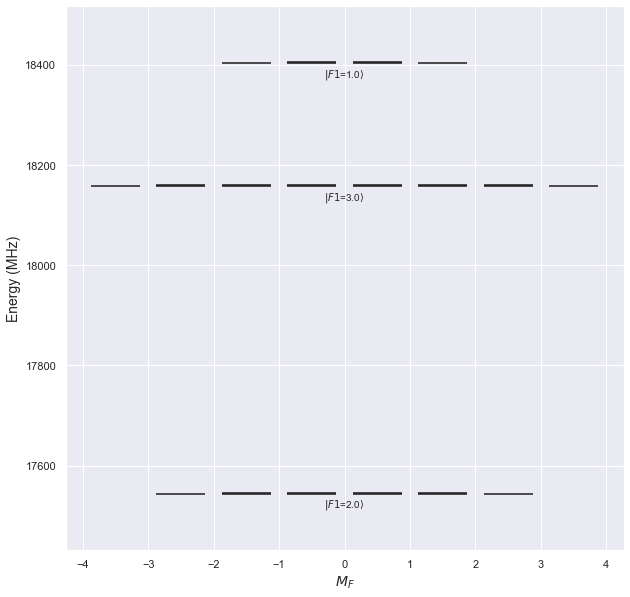

In [39]:
X000_173.display_levels(100,1e-8,'F1',label_q = ['F1','M'],idx = Gidx[2])

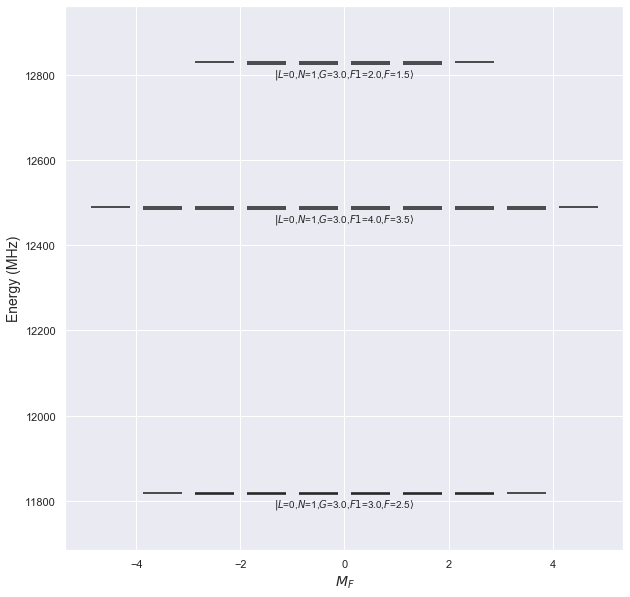

In [31]:
X000_173.display_levels(1e-8,1e-8,'F1',idx = Gidx[3])

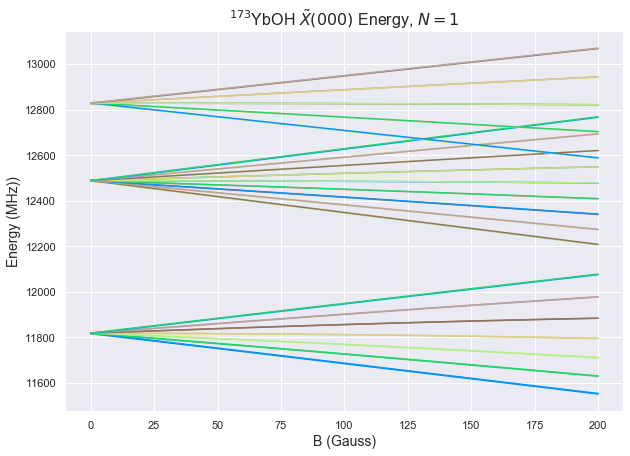

In [32]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X000_173.evals_B.T[Gidx[3]]):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(000)$ Energy, $N=1$',fontsize=16);

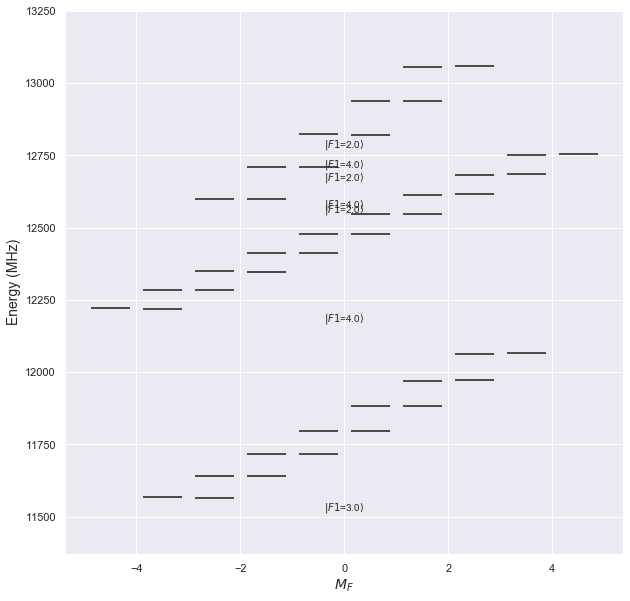

In [34]:
X000_173.display_levels(1e-8,190,'F1',label_q = ['F1','M'],idx = Gidx[3])

In [19]:
Bz = np.linspace(0.001,200,3000)
Ez = np.linspace(0.0,2000,5000)

In [20]:
X000_171 = YbOHLevels.initialize_state('171','X000',[1],M_values = 'all',I=[1/2,1/2],S=1/2,round=6)

In [21]:
Gidx = {0:X000_171.select_q({'G':0}),1:X000_171.select_q({'G':1})}

In [22]:
X000_171.ZeemanMap(Bz,0,plot=False)

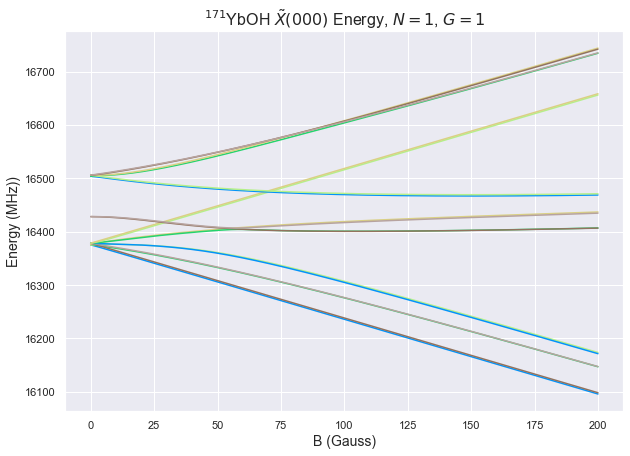

In [23]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X000_171.evals_B.T[Gidx[1]]):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{171}$YbOH $\tilde{X}(000)$ Energy, $N=1$, $G=1$',fontsize=16);

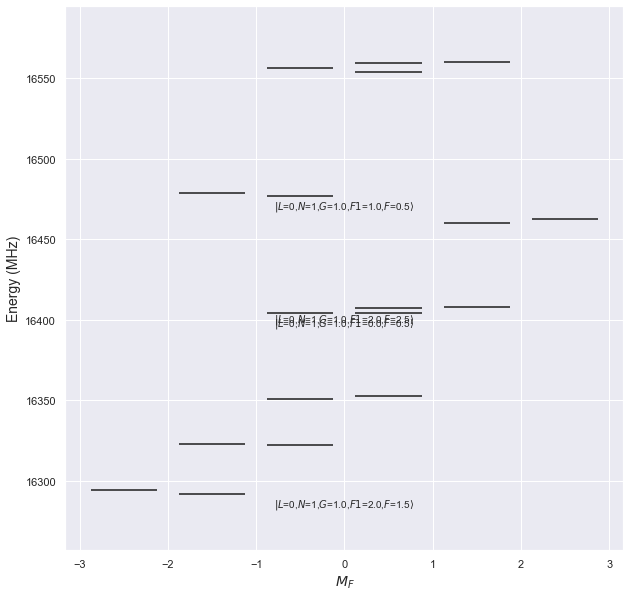

In [48]:
X000_171.display_levels(1e-8,60,'F1',idx = Gidx[1])

In [3]:
X010_173 = YbOHLevels.initialize_state('173','X010',[1],M_values = 'all',I=[5/2,1/2],S=1/2,round=6)

In [4]:
Gidx = {2:X010_173.select_q({'G':2}),3:X010_173.select_q({'G':3})}

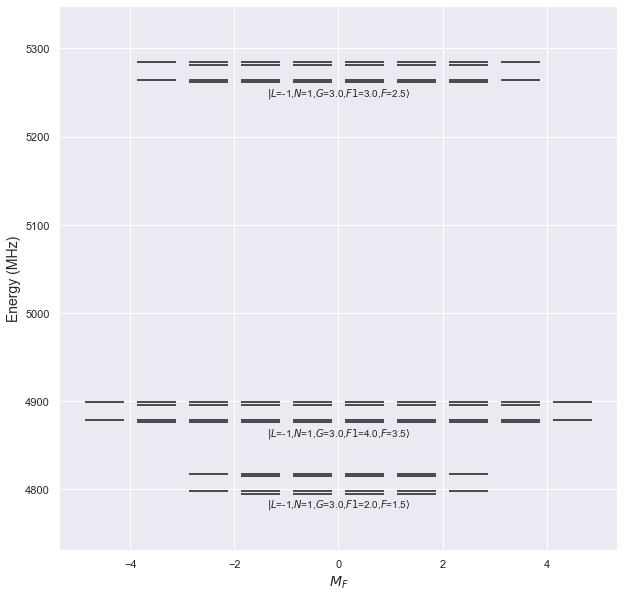

In [22]:
X010_173.display_levels(1e-8,1e-8,'F1',idx = Gidx[3])

In [ ]:
Bz = np.linspace(0.001,200,3000)
Ez = np.linspace(0.0,200,5000)

In [8]:
X010_173.ZeemanMap(Bz,0,plot=False)

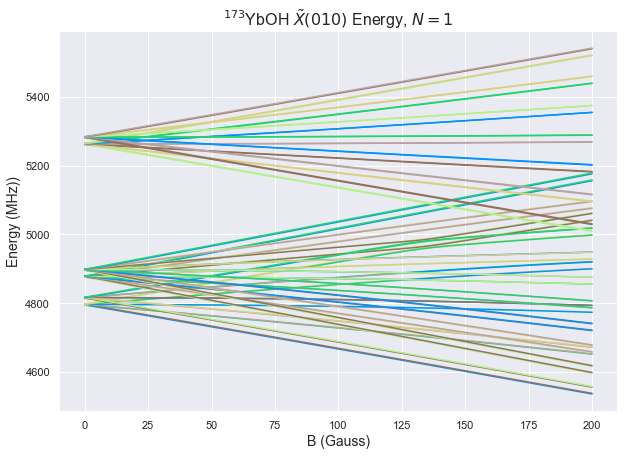

In [23]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_173.evals_B.T[Gidx[3]]):
    plt.plot(Bz,trace)
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Energy (MHz))',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ Energy, $N=1$',fontsize=16);

In [11]:
X010_173.StarkMap(Ez,1e-8,plot=False)

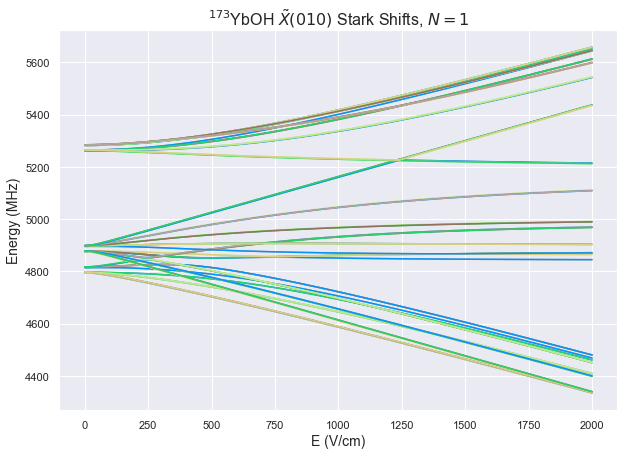

In [21]:
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_173.evals_E.T[Gidx[3]]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

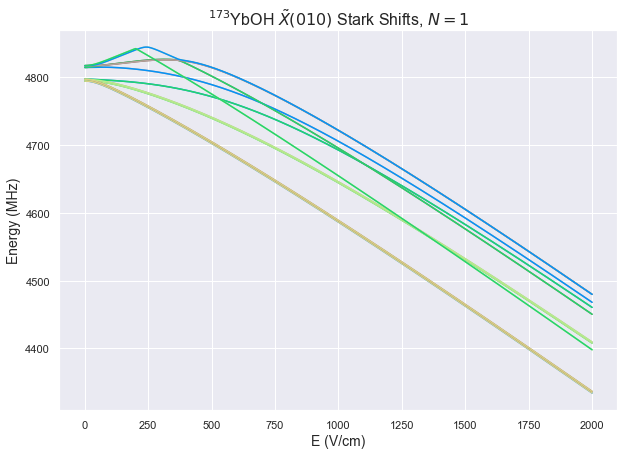

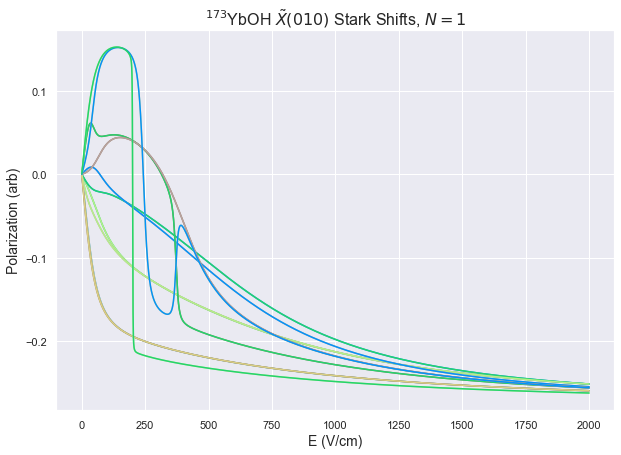

In [24]:
idx = X010_173.select_q({'G':3,'F1':2})

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_173.evals_E.T[idx]):
    plt.plot(Ez,trace)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Energy (MHz)',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_173.evals_E.T[idx]):
    grad = np.gradient(trace)
    plt.plot(Ez,grad/(Ez[1]-Ez[0]))
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization (arb)',fontsize=14)
plt.title(r'$^{173}$YbOH $\tilde{X}(010)$ Stark Shifts, $N=1$',fontsize=16);

In [9]:
A000_173 = YbOHLevels.initialize_state('173','A000',[1],M_values = 'pos',I=[5/2,1/2],S=1/2,round=6)

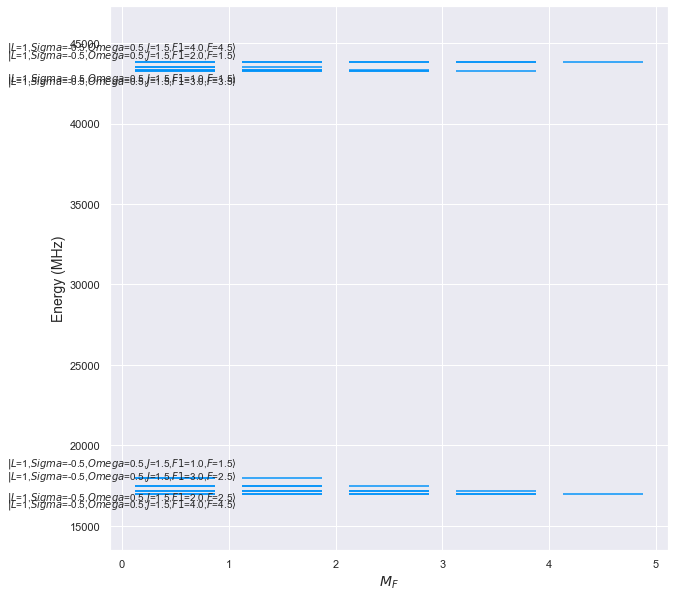

In [13]:
A000_173.display_levels(0,0,'F1',idx = A000_173.select_q({'J':1.5}))